# Get a Better Title

## Introduction

Small intro summarizing what this notebook accomplishes. Don't go to in depth.

## Business Understanding

Business Understanding stuff. Below is a good start. List some assumptions, too. Keep it succinct.

Specifically mention purpose

**Stakeholder**: Microsoft's new movie studio head 

**Problem**: What type of films should the studio create? 

**Subproblem**: What films are doing "the best at the box office?" How can this studio compete with original video content from other "big companies?"

## Data Understanding 

There are 11 CSV files comprising the dataset. This section will seek to understand the source, properties, and business relevance of the data. In particular, we will explore the structure of the data in each file, inspect individual data elements to understand their properties, and consider the relationships between the data in each file and to the business problem.

### Sources

IMDb (Internet Movie Database) is an online database maintained by a subsidiary of Amazon containing information related to millions of films, tv shows, video games, and the like. Cast, production crew, ratings, and reviews are some of the information found on IMDb. Relevant to our problem is information related to movies.
Source: [Wikipedia](https://en.wikipedia.org/wiki/IMDb)

Rotten tomatoes is a review-aggregation website and database for movies. 

The Movie DB is a user editable database for movies and TV shows.

Box Office Mojo tells us both the domestic and foreign gross incomes for each movie.

The Numbers is a website owned by Nash Information Services. They are seen as the premier source for movie financial data.  

### Properties

Let's begin exploring the data by inspecting its size and shape, along with fields and data type. Then, we'll note missing values and inspect individual elements for accuracy.

### Load the data into pandas DataFrames

In [1]:
#import necessary packages for notebook analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#examine the paths to the IMDb files
!ls ./Data/zippedData/

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [2]:
#load the contents of the files into 6 DataFrames
name_imdb = pd.read_csv('./Data/zippedData/imdb.name.basics.csv.gz')
akas_imdb_title = pd.read_csv('./Data/zippedData/imdb.title.akas.csv.gz')
basics_imdb_title = pd.read_csv('./Data/zippedData/imdb.title.basics.csv.gz')
crew_imdb_title = pd.read_csv('./Data/zippedData/imdb.title.crew.csv.gz')
principals_imdb_title = pd.read_csv('./Data/zippedData/imdb.title.principals.csv.gz')
ratings_imdb_title = pd.read_csv('./Data/zippedData/imdb.title.ratings.csv.gz')
bom = pd.read_csv('./Data/zippedData/bom.movie_gross.csv.gz')
tn = pd.read_csv('./Data/zippedData/tn.movie_budgets.csv.gz')
rt_reviews = pd.read_csv('./Data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
rt_movie_info = pd.read_csv('./Data/zippedData/rt.movie_info.tsv.gz', sep='\t', encoding='latin-1')
tmdb = pd.read_csv('./Data/zippedData/tmdb.movies.csv.gz')

### Name_imdb

In [3]:
name_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [4]:
name_imdb.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
name_imdb.tail()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


In [6]:
name_imdb['nconst'].value_counts()

nm9609974    1
nm2287833    1
nm0531901    1
nm0511892    1
nm0152447    1
            ..
nm5662988    1
nm1220383    1
nm0289354    1
nm9884403    1
nm0710957    1
Name: nconst, Length: 606648, dtype: int64

In [7]:
name_imdb['primary_profession'].value_counts()

actor                                                              88306
actress                                                            58430
producer                                                           23324
composer                                                           20125
writer                                                             18247
                                                                   ...  
art_department,music_department,director                               1
cinematographer,writer,make_up_department                              1
costume_designer,miscellaneous                                         1
transportation_department,location_management,camera_department        1
producer,writer,assistant                                              1
Name: primary_profession, Length: 8647, dtype: int64

- This data appears to contain records which represent movie industry professionals.
- The `nconst` field appears to be a unique indentifier for each professional.
- `primary_profession` field has values which are lists of professions; top 5 professions are single professions.
- `known_for_titles` has values which are lists of what appear to be movie ids for which the professional is known.
- Data cleaning would be necessary to make use of the above two fields since the values are lists. We will determine if we will use these fields later.
- These two fields also have ~30,000 to 50,000 missing values.
- This data by itself is not immediately useful for evaluating the meaningful features of hit movies, but could be merged with other data along the `known_for_titles` field.

### akas_imdb_title

In [8]:
akas_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [9]:
akas_imdb_title.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [10]:
akas_imdb_title.tail()

,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


In [11]:
akas_imdb_title['ordering'].value_counts()

1     122302
2      44686
3      41608
4      22586
5      15084
       ...  
59         1
60         1
57         1
56         1
61         1
Name: ordering, Length: 61, dtype: int64

In [12]:
# Inspecting the ordering for all Jurassic World movie aliases.
akas_imdb_title[akas_imdb_title['title_id'] == 'tt0369610'].sort_values('ordering')

,title_id,ordering,title,region,language,types,attributes,is_original_title
10,tt0369610,1,Jurassic World: Sauruste maailm,EE,NaN,imdbDisplay,NaN,0.0
21,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0
32,tt0369610,3,The Gioi Khung Long,VN,NaN,imdbDisplay,NaN,0.0
42,tt0369610,4,Yur dövrü Dünyasi,AZ,NaN,imdbDisplay,NaN,0.0
43,tt0369610,5,Iuruli periodis samyaro,GE,ka,imdbDisplay,NaN,0.0
44,tt0369610,6,Jurassic World,PL,NaN,imdbDisplay,NaN,0.0
45,tt0369610,7,Mundo Jurásico,UY,NaN,NaN,3-D version,0.0
46,tt0369610,8,Jurassic World 3D,PL,NaN,NaN,3-D version,0.0
47,tt0369610,9,Jurassic World - Mundo Jurásico,AR,NaN,imdbDisplay,NaN,0.0
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


- This data appears to contain records which represent movie titles as they're known in certain regions of the world.
- The `title_id` field probably maps to `known_for_titles` from names_imdb.
- The `ordering` field starts at 1 and increments for each regional title associated with a title id.
- Grouping by `title_id` and filtering to the original title name is probably the best use case for this data.

### basics_imdb_title

In [13]:
basics_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [14]:
basics_imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
basics_imdb_title.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [16]:
# check if the number or unique 'tconst' values is equal to the number of records.
len(basics_imdb_title['tconst'].unique())

146144

In [17]:
basics_imdb_title['start_year'].describe()

count    146144.000000
mean       2014.621798
std           2.733583
min        2010.000000
25%        2012.000000
50%        2015.000000
75%        2017.000000
max        2115.000000
Name: start_year, dtype: float64

In [18]:
basics_imdb_title['runtime_minutes'].describe()

count    114405.000000
mean         86.187247
std         166.360590
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [19]:
basics_imdb_title['genres'].value_counts()

Documentary                32185
Drama                      21486
Comedy                      9177
Horror                      4372
Comedy,Drama                3519
                           ...  
Fantasy,Music,Sci-Fi           1
Comedy,Short                   1
Animation,Family,Sci-Fi        1
Family,History,Mystery         1
Mystery,News,Thriller          1
Name: genres, Length: 1085, dtype: int64

- The records are movie titles, one per row. Each record is a distinct title. There are 146,144 records.
- `tconst` field contains title ids that probably map to the title ids in the other files.
- The titles begin in 2010 and include titles yet to be released.
- There are missing values in the `runtime_minutes` and `genres` fields.
- `genres` has values which are lists of genres.
- Runtimes and genres could be useful fields to help evaluate movies.

### crew_imdb_title

In [20]:
crew_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [21]:
crew_imdb_title.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [22]:
crew_imdb_title.tail()

,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


In [23]:
crew_imdb_title['tconst'].value_counts()

tt1648045    1
tt1371160    1
tt6035846    1
tt6305910    1
tt4185572    1
            ..
tt2626798    1
tt1975839    1
tt2404376    1
tt1843148    1
tt9500068    1
Name: tconst, Length: 146144, dtype: int64

- Each record is a movie title. There are distinct title ids, `tconst`, for each row.
- Each record contains lists of directors and writers.
- The `directors` and `writers` fields would need to be cleaned since there are missing values and lists of strings.
- There are 146,144 title ids, which is equivalent to the number of title ids in the basics table.
- By itself this data cannot help evaluate movie potential, but it could be merged with other data along the `tconst` field.

### principals_imdb_title

In [24]:
principals_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [25]:
principals_imdb_title.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [26]:
principals_imdb_title.tail()

,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


- Each record contains information for a movie title and movie professional pair.
- This is another example of data that needs merged with other tables for value in assessing movie quality.

### ratings_imdb_title

In [27]:
ratings_imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [28]:
ratings_imdb_title.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [29]:
ratings_imdb_title.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [30]:
# confirm that 'tconst' is a unique id
ratings_imdb_title['tconst'].value_counts()

tt3447294    1
tt2081438    1
tt1282140    1
tt2955378    1
tt2182115    1
            ..
tt3088516    1
tt6952960    1
tt3262084    1
tt7525458    1
tt4442604    1
Name: tconst, Length: 73856, dtype: int64

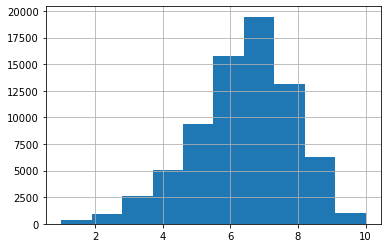

In [31]:
ratings_imdb_title['averagerating'].hist();

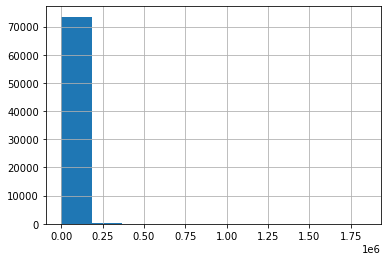

In [32]:
ratings_imdb_title['numvotes'].hist();

In [33]:
ratings_imdb_title[['averagerating', 'numvotes']].describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


- Each record contains rating information for a movie title. Each record has a distinct movie title id.
- Not all title ids from basics table has a rating.
- The median number of votes is 49, but there is at least one outlier of over 1 million votes.
- This data shows promise for understanding movie quality via the `averagerating` or `numvotes` field.


### Rotten Tomatoes Movie Info


In [34]:
# Visually confirming table was read properly
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [35]:
# Making observations based on table metadata
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


**Notes:**  
1. Columns 8, 9, and 11 seem to contain significantly more NaN values then the other columns.
2. Rating is the MPAA rating
3. 'theater_date' and 'dvd_date' not datetime objects
4. 'box_Office' appears to be the money made at the box office, but is not an integer/float
5. There is NO name assosiated with this table. Movies seem to be identified by 'id'


###  Rotten Tomatoes Reviews


In [36]:
# Visually confirming table was read properly
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [37]:
# Making observations based on table metadata
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


**Notes:**  
1. ID seems to be a foreign key in this table. There is still no way to identify the NAME of the movie outside of speculation, though it may be irrelevant.
2. Top critic appears to be a boolean value.
3. Rating seems to be a fraction out of 5. Will need to convert to float.
4. 'Data' column not 'datetime' object.

## Final Rotten Tomato Notes

There is a great deal of useful statistics in here. If the two Rotten Tomato tables are joined a great deal of observations could be made.

1. Critic ratings based on genre  
2. Box office earnings by rating (MPAA)  
3. Rating by Runtime  
4. Writers / Directors who result in the most box office   revenue  

These are all examples of statistics that could be used to recommend actions to the head of the studio like:

1. What kind of Genre is most likely to Rate well
2. What kind of movie rating (MPAA) is most likley to make the most box office earnings
3. The target length for a movie to get the highest rating.
4. What kind of writers or directors to hire.

**Limitiations**
- The box office column has a severe amount of null values. About 80% of the entries are missing their 'box office' value.

Even without the box office column, this dataset could provide plenty of other reccomendations with the other data.


### The Movie DB

In [38]:
# Visually confirm table was read properly
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [39]:
# There appears to be an index column already in this table. I will drop the column rather then re-read the file.
tmdb.drop(axis= 1, labels='Unnamed: 0', inplace=True)

#Re-check table
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [40]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


**Notes:**  
1. No null values.
2. Genre_ids looks like a list of numbers that corrosponds to a genre.
3. vote_average and vote_count looks to be about user ratings.
4. Immedietly it may be intresting to look at the relationship between 'popularity' and 'vote_average'

[Popularity](https://developers.themoviedb.org/3/getting-started/popularity) seems to be a unique metric for calculating how popular an entry is based on recent user interaction with the entry 

In [41]:
# Lets look at some general stats for the integer columns
tmdb.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [42]:
# The 'popularity' mean value looks a little off to me. Let's check the column for irregularities.
tmdb['popularity'].value_counts()

0.600     7037
1.400      649
0.840      587
0.624      104
0.625       92
          ... 
3.742        1
14.749       1
7.924        1
8.414        1
9.060        1
Name: popularity, Length: 7425, dtype: int64

**Notes**  
It seems to me that '0.600' may be a placeholder value due to the sheer number of occurances.

In [43]:
# The 'popularity' column has made me suspicous, so now lets check the 'vote_count' column
tmdb['vote_count'].value_counts()

1       6541
2       3044
3       1757
4       1347
5        969
        ... 
2328       1
6538       1
489        1
2600       1
2049       1
Name: vote_count, Length: 1693, dtype: int64

In [44]:
# It is certainly possible that there are 6541 movies with 1 vote, but it feels unlikely.
tmdb[tmdb['vote_count'] == 1]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
770,"[28, 80, 18, 53]",51488,en,Full Love,2.288,2010-01-01,Full Love,10.0,1
873,"[878, 27]",27485,en,Megaconda,1.960,2010-01-01,Megaconda,7.0,1
1004,"[12, 80]",76747,ru,Burning Daylight,1.588,2010-11-14,Burning Daylight,6.0,1
1008,"[16, 10751]",52272,en,Bratz: Pampered Petz,1.579,2010-10-05,Bratz: Pampered Petz,5.0,1
1063,"[9648, 53]",295682,en,Bright Falls,1.400,2010-04-27,Bright Falls,9.0,1
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


**Notes**  
Multiple issues discovered here, vote_average, vote_count and popularity all seem to have placeholder values.

## Final The Movie DB Notes

**Example Observations:**

1. User rating (vote_average) based on genre
2. Most common words in the title of the movies with the highest user rating (vote_average)

These are all examples of statistics that could be used to recommend actions to the head of the studio like:

1. What kind of film genre is most likely to rate well
2. What kind of words should be put in the movies title

**Limitiations**
- The box office column has a severe amount of null values. About 80% of the entries are missing their 'box office' value.
- The 'vote_count', 'vote_average', and 'popularity' all have some form of placeholder values.

The data here would require heavy cleaning, but is far from unusable.

### Box Office Mojo

In [45]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


###### This table is missing almost 1/3rd of its foreign gross and we are giving microsoft recommendations for global success.

In [46]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [47]:
bom.tail(15)

,title,studio,domestic_gross,foreign_gross,year
3372,Gabriel and the Mountain,Strand,18400.0,NaN,2018
3373,Marlina the Murderer in Four Acts,Icar.,17800.0,NaN,2018
3374,The Escape,IFC,14000.0,NaN,2018
3375,How Victor 'The Garlic' Took Alexey 'The Stud'...,CARUSEL,13000.0,NaN,2018
3376,"Lou Andreas-Salomé, the Audacity to be Free",CLS,12900.0,NaN,2018
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018


###### To make things even worse, this dataset is missing foreign_gross on the more recent movies.  We are trying to tell Microsoft what is trending today.

After looking at our next dataset we decided to just use The Numbers for our financial data.  The only thing that Box Office Mojo has that The Numbers doesn't is the studio name, and that information does not help answer our business question.

### The Numbers

In [48]:
tn.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [49]:
tn.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
5773,74,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928"
5774,75,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


##### Right away we notice that our financial data are not integers due to the prescense of  $ signs and commas

In [50]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


This dataset is great because it has no null values, and gives us 5782 records of financial data.

### Data Understanding Summary

After analyzing each file, the following files have been chosen for our final analysis: <br>

- IMDb Basics 
    - Features: runtime_minutes, genres
- IMDb Ratings
    - Target Metrics: averagerating, numvotes
- The Numbers
    - Feature: release_date
    - Target Metrics: production_budget, domestic_gross, worldwide_gross

The aforementioned target metrics are of value to the business problem because they include both financial and reach metrics.  The features that we will use are runtime_minutes, genres and release_date. 

## Data Cleaning

This section prepares the IMDb and The Numbers files chosen for analysis to be merged. The result will be 3 DataFrames.
- IMDb df = basics and ratings joined on the `tconst` id
- The Numbers df
- IMDb df and The Numbers df joined on an id created by the combination of a film's title and release year.

### Data Preparation - IMDb

In [51]:
# reassign basics_imdb_title to basics for simplicity
basics = basics_imdb_title

# Take a look
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [52]:
# reassign ratings_imdb_title to ratings for simplicity
ratings = ratings_imdb_title

# check to make sure the data loaded as expected
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


The two DataFrames will be joined on the `tconst` field, a unique identifier for each movie title.

In [53]:
# check the length of tconst
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [54]:
# check the length of tconst
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


There are fewer records of movies in the ratings table than the basics table. Both tables have completely distinct records. These tables should be **outer joined** to preserve information about movies that don't have an IMDb rating. *This information could still be useful after the merge with data from other sources.*

In [55]:
# set the index to the tconst column to join them
imdb = basics.set_index('tconst').join(ratings.set_index('tconst'), how='outer')

# check to see if join went as expected
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [56]:
# check the number of records and if there are missing values for averagerating and numvotes
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.9+ MB


#### Create new ID

The tables have been merged. All records remain intact, while there are some expected missing values for the averagerating and numvotes columns. Currently, the index is set to an id specified by the `tconst` column. In order to join this IMDb data with other sources, a new ID will need to be created. `tconst` is unique to the IMDb data. The new ID will be a string containing the name of the movie and its release year.

In [57]:
# take a look at the current format
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [58]:
# create new column and remove any leading or trailing whitespace in the title
imdb['movie_id'] = imdb['primary_title'].str.strip()

# convert titles to lowercase
imdb['movie_id'] = imdb['movie_id'].str.lower()

# check result
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,sunghursh
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,one day before the rainy season
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,the other side of the wind
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,sabse bada sukh
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,the wandering soap opera


In [59]:
# append the year to the movie_id
imdb['movie_id'] = imdb['movie_id'] + imdb['start_year'].astype(str)

# check result
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,sunghursh2013
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,one day before the rainy season2019
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0,the other side of the wind2018
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0,sabse bada sukh2018
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0,the wandering soap opera2017


In [60]:
# set the index to the new movie_id
imdb = imdb.set_index('movie_id')

#check result
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,,,
sunghursh2013,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
the other side of the wind2018,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
sabse bada sukh2018,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
the wandering soap opera2017,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


#### Drop unnecessary columns

The new index has been created, consisting of the lowercase name of the movie with the year appended at the end. The IMDb data is almost ready to be joined with other data sources. Now that the year has been included in the index, it is no longer needed for analysis. Let's drop that column. The original_title column will also be dropped as only the primary_title is necessary for further analysis. The original_title is the title in its original language.

In [61]:
# drop the original_title column, but keep all rows
imdb = imdb.drop(['original_title', 'start_year'], axis=1)

# check the result
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, sunghursh2013 to chico albuquerque - revelações2013
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   runtime_minutes  114405 non-null  float64
 2   genres           140736 non-null  object 
 3   averagerating    73856 non-null   float64
 4   numvotes         73856 non-null   float64
dtypes: float64(3), object(2)
memory usage: 6.7+ MB


In [62]:
# take a look
imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sunghursh2013,Sunghursh,175.0,"Action,Crime,Drama",7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43.0
the other side of the wind2018,The Other Side of the Wind,122.0,Drama,6.9,4517.0
sabse bada sukh2018,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13.0
the wandering soap opera2017,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119.0


#### Drop duplicated movie ids

In [63]:
# check how many indices are duplicated and their identities
print(imdb.index.duplicated().sum())
imdb.index.value_counts()[imdb.index.value_counts() > 1]

2161


ângelo de sousa - tudo o que sou capaz2010    7
split2016                                     6
inside out2011                                5
homecoming2011                                4
a christmas carol2018                         4
                                             ..
tracks2013                                    2
race to win2016                               2
the jokesters2015                             2
dreams2013                                    2
family relics2015                             2
Name: movie_id, Length: 1953, dtype: int64

There are 1,953 movie_ids which are duplicated 2,161 times in total. Let's investigate one.

In [64]:
# check an example
imdb.loc['split2016']

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
split2016,Split,90.0,"Comedy,Romance,Sport",2.9,557.0
split2016,Split,127.0,"Drama,Fantasy",3.6,380.0
split2016,Split,NaN,Crime,6.8,5.0
split2016,Split,117.0,"Horror,Thriller",7.3,358543.0
split2016,Split,80.0,Drama,7.0,21.0
split2016,Split,123.0,"Action,Drama,Sport",5.4,189.0


One movie has significantly more votes, as indicated by the numvotes column, than the others that share a movie_id. This may be because only one of the movies is legitimate and the others are mistaken duplicates. It could also be that there are two or more different movies with the same name that released in the same year. Whatever the case may be, our strategy will be to remove all movie_ids other than the one with the most number of votes. If the movie_id is a mistaken duplicate, we don't want that information leaking into our analysis. If it is not a mistake, we will lose some data on the less popular movies, but that is an acceptable cost given the small number of duplicates and the greater cost of mistaken duplicate information.

In [65]:
# drop duplicate movie_id's if they don't have the max number of votes for that movie_id
max_votes_id = imdb.groupby('movie_id')['numvotes'].transform(max) == imdb['numvotes']
imdb = imdb[max_votes_id]

# check the result
imdb.index.value_counts()

arjuna2015                          2
bad & the birdieman2016             2
little heroes2017                   2
jens jensen the living green2013    1
justice dot net2018                 1
                                   ..
one nation under dog2012            1
night manager2014                   1
kuthoosi2019                        1
p-0472011                           1
kid-thing2012                       1
Name: movie_id, Length: 73264, dtype: int64

In [66]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73267 entries, sunghursh2013 to drømmeland2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73267 non-null  object 
 1   runtime_minutes  65720 non-null  float64
 2   genres           72475 non-null  object 
 3   averagerating    73267 non-null  float64
 4   numvotes         73267 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.4+ MB


There are still 3 duplicates. Let's check those.

In [67]:
imdb.loc[['bad & the birdieman2016', 'arjuna2015', 'little heroes2017']]

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
bad & the birdieman2016,Bad & the Birdieman,NaN,Documentary,3.2,6.0
bad & the birdieman2016,Bad & the Birdieman,52.0,Documentary,4.7,6.0
arjuna2015,Arjuna,75.0,Drama,6.8,6.0
arjuna2015,Arjuna,NaN,"Action,Crime,Drama",4.8,6.0
little heroes2017,Little Heroes,76.0,Animation,7.6,9.0
little heroes2017,Little Heroes,95.0,"Action,Adventure,Comedy",5.3,9.0


We will drop the two records without a runtime. We will keep both of the "little heroes2017" records. There are in fact two movies from 2017 named "Little Heroes." This is an example of data that might have been lost in the previous drop operation, but we'll keep this time since it could be easily inspected.

In [68]:
# filter the rows to remove those with the selected indices and NaN runtimes
keep_id = ((imdb.index != 'arjuna2015') & (imdb.index != 'bad & the birdieman2016')) | (imdb['runtime_minutes'].notnull())
imdb = imdb[keep_id]

# check result
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73265 entries, sunghursh2013 to drømmeland2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73265 non-null  object 
 1   runtime_minutes  65720 non-null  float64
 2   genres           72473 non-null  object 
 3   averagerating    73265 non-null  float64
 4   numvotes         73265 non-null  float64
dtypes: float64(3), object(2)
memory usage: 3.4+ MB


Now there are 73,265 entries. To complete cleaning this data we need to unpack the genre column.

In [69]:
imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sunghursh2013,Sunghursh,175.0,"Action,Crime,Drama",7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,"Biography,Drama",7.2,43.0
the other side of the wind2018,The Other Side of the Wind,122.0,Drama,6.9,4517.0
sabse bada sukh2018,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13.0
the wandering soap opera2017,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [70]:
# split the genres string on "," into a list of strings
imdb['genres'] = imdb['genres'].str.split(',')

# explode the genres column into rows for each genre
imdb = imdb.explode('genres')

#check result
imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sunghursh2013,Sunghursh,175.0,Action,7.0,77.0
sunghursh2013,Sunghursh,175.0,Crime,7.0,77.0
sunghursh2013,Sunghursh,175.0,Drama,7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,Biography,7.2,43.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,Drama,7.2,43.0


In [71]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128305 entries, sunghursh2013 to drømmeland2019
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    128305 non-null  object 
 1   runtime_minutes  118068 non-null  float64
 2   genres           127513 non-null  object 
 3   averagerating    128305 non-null  float64
 4   numvotes         128305 non-null  float64
dtypes: float64(3), object(2)
memory usage: 5.9+ MB


After exploding the `genres` column, there are 128,305 entries.

### Summary

The IMDb data is now ready to be joined with data from The Numbers. The two original tables have been joined, a new movie id index has been created, and columns unnecessary for further analysis have been dropped. Also, duplicated movie ids have been dropped, and the genres have been unpacked. With this DataFrame, we'll be able to attempt to join The Numbers data on the new movie_id index. 

### Data Preparation - The Numbers

##### In order for us to change our financial columns into integers, we must first strip them of their non numeric elements.

In [72]:
# This code removes the '$' from our financial data.

tn['worldwide_gross'] = tn['worldwide_gross'].str.strip('$')
tn['domestic_gross'] = tn['domestic_gross'].str.strip('$')
tn['production_budget'] = tn['production_budget'].str.strip('$')

In [73]:
# Now we remove the commas

tn['worldwide_gross'] = tn['worldwide_gross'].str.replace(',', '' )
tn['domestic_gross'] = tn['domestic_gross'].str.replace(',', '')
tn['production_budget'] = tn['production_budget'].str.replace(',', '')

###### Double check to see if all of our commas and '$' signs are gone.

In [74]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


###### Now our 3 columns can be changed into numeric data

In [75]:
# overwriting our collumns and changing the data type to int.

tn['production_budget'] = pd.to_numeric(tn['production_budget'])
tn['domestic_gross'] = pd.to_numeric(tn['domestic_gross'])
tn['worldwide_gross'] = pd.to_numeric(tn['worldwide_gross'])

In [76]:
# Check that data type was changed to int
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [77]:
# check for any unexpected values
tn['domestic_gross'].value_counts()

0           548
8000000       9
2000000       7
7000000       7
10000000      6
           ... 
449865        1
10547117      1
4476235       1
56653         1
40157856      1
Name: domestic_gross, Length: 5164, dtype: int64

In [78]:
# check for any unexpected values
tn['worldwide_gross'].value_counts()

0            367
8000000        9
7000000        6
2000000        6
4000000        4
            ... 
166000000      1
42843521       1
101173038      1
478595         1
12996          1
Name: worldwide_gross, Length: 5356, dtype: int64

There is an unexpected amount of zeroes in both gross columns. 

######  We have no way of deciphering if these zeroes are real values or place holders.  It is possible that these movies never made it to theaters.

Therefore we are going to drop the rows with zeroes in the worldwide_gross column in order to get accurate data on international revenue. Also, because Microsoft is a company with global influence, we will use the worldwide_gross for our analysis instead of domestic_gross.

In [79]:
# Here we drop every row where there is a zero in the worldwide_gross column

tn.drop(tn[tn['worldwide_gross'] == 0].index, inplace=True)

In [80]:
# check to see if our zeroes are gone
tn['worldwide_gross'].value_counts()

8000000      9
2000000      6
7000000      6
9000000      4
4000000      4
            ..
166000000    1
42843521     1
101173038    1
478595       1
104267443    1
Name: worldwide_gross, Length: 5355, dtype: int64

In [81]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5415 non-null   int64 
 1   release_date       5415 non-null   object
 2   movie              5415 non-null   object
 3   production_budget  5415 non-null   int64 
 4   domestic_gross     5415 non-null   int64 
 5   worldwide_gross    5415 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 296.1+ KB


### While we have some great financial data here, we still lack financial metrics that show us profit.

###### We can add columns to give us more insight
- Worldwide Profit = worldwide_gross - production_budget
- Worldwide ROI = worldwide_profit / production_budget
- Worldwide Profit Margin = worldwide_profit / worldwide_gross

In [82]:
tn['worldwide_profit'] = tn['worldwide_gross'] - tn['production_budget']

tn['worldwide_ROI']  =  tn['worldwide_profit'] / tn['production_budget']

tn['worldwide_profit_margin'] = tn['worldwide_profit'] / tn['worldwide_gross'] 

###### Check our work

In [83]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,worldwide_profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,0.846921
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,0.607331
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,-1.337036
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,0.764364
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,0.759251


###### We will make a month column in order to find out the optimal time of year to release movies.

In [84]:
# str.slice the first 3 elements of the release_date and add that to its own seperate column

tn['month'] = tn['release_date'].str.slice(stop=3)

In [85]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,worldwide_profit_margin,month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,0.846921,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,0.607331,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,-1.337036,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,0.764364,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,0.759251,Dec


###### We plan on merging this DataFrame with the IMDb DataFrame.  In order to do this we will create a movie_id and set it as the index and merge on that.

In [86]:
#Here our movie_id column consists of both the the name of the movie lowercased followed by the year from release_date.

tn['movie_id'] = tn['movie'].str.lower() + tn['release_date'].str.slice(start=-4)

In [87]:
#We take out trailing and leading white space so that we can have as clean of a merge as possible

tn['movie_id'].str.slice()

0                                            avatar2009
1       pirates of the caribbean: on stranger tides2011
2                                      dark phoenix2019
3                           avengers: age of ultron2015
4                 star wars ep. viii: the last jedi2017
                             ...                       
5775                                         cavite2006
5776                                the mongol king2004
5778                                      following1999
5779                  return to the land of wonders2005
5781                              my date with drew2005
Name: movie_id, Length: 5415, dtype: object

##### The final step to prepare this table for a merge is to set the month_id column as the index. 

In [88]:
tn = tn.set_index('movie_id')

In [89]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,worldwide_profit_margin,month
movie_id,,,,,,,,,,
avatar2009,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,0.846921,Dec
pirates of the caribbean: on stranger tides2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,0.607331,May
dark phoenix2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,-1.337036,Jun
avengers: age of ultron2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,0.764364,May
star wars ep. viii: the last jedi2017,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,0.759251,Dec


### Data Preparation - Join IMDb and The Numbers

With both IMDb and The Numbers cleaned we will now join them on the movie_id index.

In [90]:
imdb.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,
sunghursh2013,Sunghursh,175.0,Action,7.0,77.0
sunghursh2013,Sunghursh,175.0,Crime,7.0,77.0
sunghursh2013,Sunghursh,175.0,Drama,7.0,77.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,Biography,7.2,43.0
one day before the rainy season2019,One Day Before the Rainy Season,114.0,Drama,7.2,43.0


In [91]:
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,worldwide_profit_margin,month
movie_id,,,,,,,,,,
avatar2009,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,0.846921,Dec
pirates of the caribbean: on stranger tides2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,0.607331,May
dark phoenix2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,-1.337036,Jun
avengers: age of ultron2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,0.764364,May
star wars ep. viii: the last jedi2017,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696,0.759251,Dec


In [92]:
# Merge tables on "move_id" column
imdb_tn = imdb.merge(tn, on='movie_id')

# Visually confirm expected results
imdb_tn.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,worldwide_profit_margin,month
movie_id,,,,,,,,,,,,,,,
foodfight!2012,Foodfight!,91.0,Action,1.9,8248.0,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-44926294,-0.998362,-609.533742,Dec
foodfight!2012,Foodfight!,91.0,Animation,1.9,8248.0,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-44926294,-0.998362,-609.533742,Dec
foodfight!2012,Foodfight!,91.0,Comedy,1.9,8248.0,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-44926294,-0.998362,-609.533742,Dec
the secret life of walter mitty2013,The Secret Life of Walter Mitty,114.0,Adventure,7.3,275300.0,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,1.064409,0.515600,Dec
the secret life of walter mitty2013,The Secret Life of Walter Mitty,114.0,Comedy,7.3,275300.0,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,1.064409,0.515600,Dec


### Data Preparation - Summary

Now we have 3 cleaned DataFrames to analyze:
- imdb: genres, runtime_minutes, and reach metrics
- tn: release_month and financial metrics
- imdb_tn: all of the above

## Data Analysis and Visualization

In this section we will produce 3 recommendations supported by analysis and visualizations. 
- **Which genre(s) give the most lift to ROI?**
- **When is the optimal time to release animated movies?**
- **Is there an ideal runtime for animated movies?** 

### Which genre(s) give the most lift to ROI?

This question requires us to use the combined DataFrame. We will use ROI as our financial metric since it is an efficiency metric that includes gross earnings and production budget. Our assumption is that Microsoft's new studio is concerned with investing money efficiently. First we will look at the distribution of ROI.

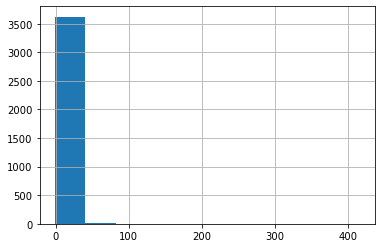

In [93]:
imdb_tn['worldwide_ROI'].hist();

In [94]:
imdb_tn['worldwide_ROI'].describe()

count    3634.000000
mean        2.945131
std        12.920219
min        -0.999974
25%         0.043319
50%         1.331392
75%         3.202364
max       415.564740
Name: worldwide_ROI, dtype: float64

Worldwide ROI is highly skewed. Therefore there is a discrepancy between the mean and the median. The median is a better measure of central tendency when the data skewed. Percentiles are also an appropriate summary statistic for this type of data.

In [95]:
# Group the table by genres, and aggregate by the median. Sort by "worldwide_gross", descending
grouped_imdb_tn = imdb_tn.groupby('genres').median().sort_values('worldwide_ROI', ascending=False)

# Visually confirm expected results
grouped_imdb_tn

,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,worldwide_profit,worldwide_ROI,worldwide_profit_margin
genres,,,,,,,,,,
Mystery,105.0,6.30,68998.0,55.0,14500000.0,26851266.5,61166295.5,39117893.5,2.573175,0.719501
Horror,95.5,5.90,47808.5,55.0,10000000.0,26197915.5,44202303.5,29065832.0,2.296345,0.696634
Animation,95.0,6.70,73170.5,43.5,87500000.0,113370261.5,316450194.5,202467009.0,1.996890,0.666321
Sci-Fi,112.0,6.60,204481.0,50.0,90000000.0,78765986.0,240647629.0,123617305.0,1.778310,0.640069
Adventure,108.0,6.50,123127.0,46.0,100000000.0,83670083.0,249517956.0,133691277.0,1.659514,0.623991
Thriller,105.0,6.30,78932.5,54.5,21000000.0,30570973.5,57176634.0,35944700.5,1.534840,0.605495
Comedy,102.0,6.30,59253.0,50.0,29000000.0,40847995.0,70027933.0,35768579.0,1.494504,0.599119
Romance,105.0,6.30,55698.0,58.0,18000000.0,24477704.0,42843521.0,19795070.0,1.369697,0.578005
Music,107.0,6.40,22977.0,58.0,15000000.0,20218921.0,32700439.0,12876066.0,1.287002,0.562746


We'll be making 3 graphs:

- A graph of the median ROI values by movie genre.
- A graph showing the 90th percentile values by movie genre
- A graph showing the 10th percentile values by movie genre.

### Median ROI by Movie Genre

<ipython-input-156-52eec118bc9b>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  imdb_tn_median.set_yticklabels(yticklabels)


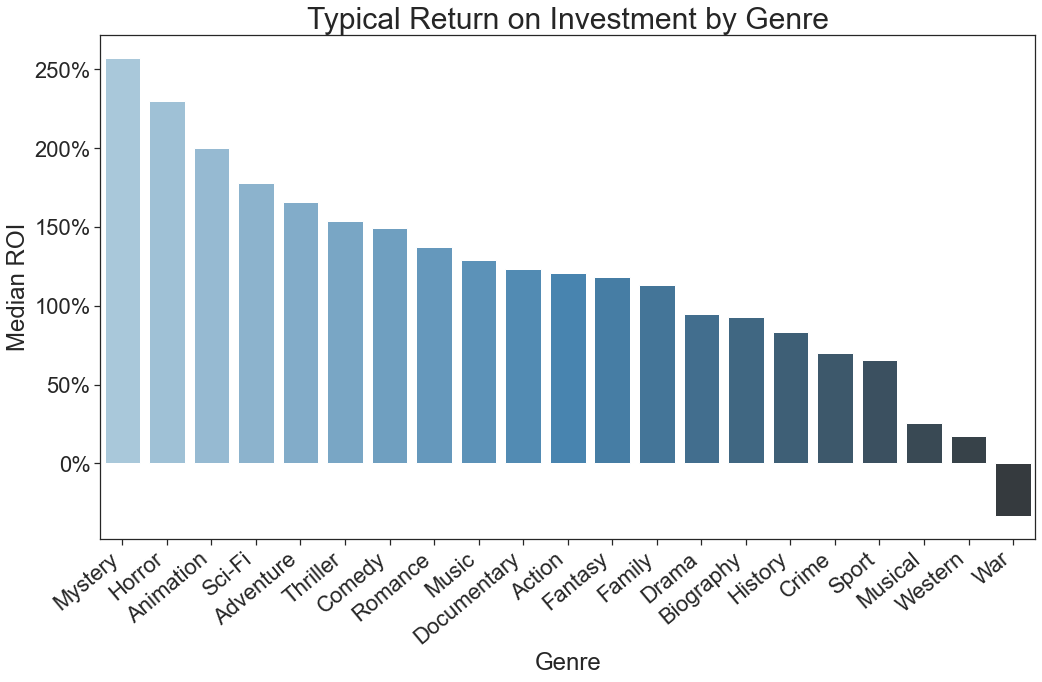

In [156]:
# Define figure/axis
fig, ax = plt.subplots()

# Set Seaborn figure size and style
sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme(context='talk')
sns.set(font_scale =2)
sns.set_style('ticks')

# Create visual
imdb_tn_median = sns.barplot(data=grouped_imdb_tn, x=grouped_imdb_tn.index, y='worldwide_ROI', ax=ax, palette="Blues_d" )

# Customize asthetic
imdb_tn_median.set_xticklabels(imdb_tn_median.get_xticklabels(),
                               rotation = 40, horizontalalignment='right') # rotate xaxis tick labels
ax.grid(False) # remove all gridlines
imdb_tn_median.set_title('Typical Return on Investment by Genre', fontsize=30)
imdb_tn_median.set_xlabel('Genre')
imdb_tn_median.set_ylabel('Median ROI')

# set yticklabels to be a %
yticklabels = [f'{tick *100:.0f}%' for tick in imdb_tn_median.get_yticks()]
imdb_tn_median.set_yticklabels(yticklabels)

# set tight layout for saving as png
plt.tight_layout()

#save as png
fig.savefig('Images/Typical Return on Investment by Genre.png')

Just from this graph it is clear that some genres of movies have a higher return on investment then others. But this doesn't tell the whole story either. Let's look at the top 10% and bottom 10% of ROI's. This will help inform what the best and worst case scenerios could be.

### 90th percentile ROI by genre

In [97]:
# Group by top 10% and sort by ROI
top_imdb_tn = imdb_tn.groupby('genres').quantile(q=0.9).sort_values('worldwide_ROI', ascending=False)

<ipython-input-155-ca5c5a785684>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  top.set_yticklabels(yticklabels)


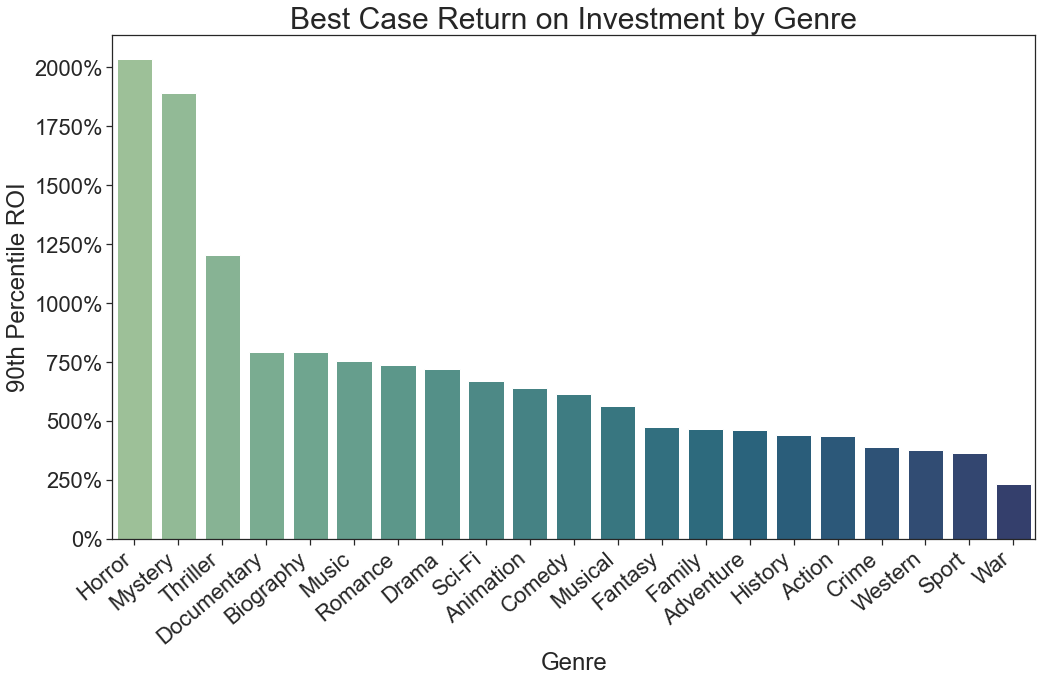

In [155]:
# Create visual
figtop, axtop = plt.subplots()

top = sns.barplot(data=top_imdb_tn, x=top_imdb_tn.index, y='worldwide_ROI', ax=axtop, palette="crest" )

# Customize asthetic
top.set_xticklabels(top.get_xticklabels(),
                    rotation = 40, horizontalalignment='right') # rotate xaxis tick labels
axtop.grid(False) # Remove gridlines.
top.set_title("Best Case Return on Investment by Genre", fontsize=30)
top.set_xlabel('Genre')
top.set_ylabel('90th Percentile ROI')

# set yticklabels to be a %
yticklabels = [f'{tick *100:.0f}%' for tick in top.get_yticks()]
top.set_yticklabels(yticklabels)

# set tight layout for saving as png
plt.tight_layout()

#save as png
figtop.savefig('Images/Best Case Return on Investment by Genre.png')

### 10th percentile ROI by genre

In [99]:
# Group by bottom 10% and sort by ROI
bottom_imdb_tn = imdb_tn.groupby('genres').quantile(q=0.1).sort_values('worldwide_ROI', ascending=False)

<ipython-input-154-8bf4997c4a4c>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  bot.set_yticklabels(yticklabels)


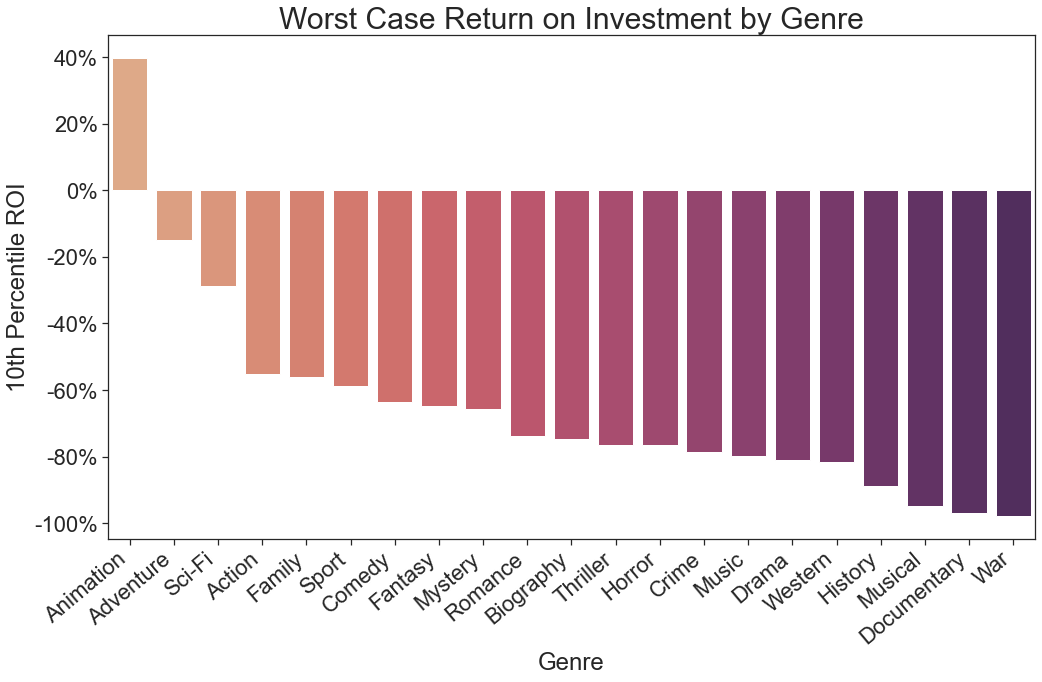

In [154]:
# Create visual
figbot, axbot = plt.subplots()

bot = sns.barplot(data=bottom_imdb_tn, x=bottom_imdb_tn.index, y='worldwide_ROI', ax=axbot, palette="flare" )

# Customize asthetic
bot.set_xticklabels(bot.get_xticklabels(),rotation = 40, horizontalalignment='right') # rotate xaxis tick labels
axbot.grid(False) # Show the vertical gridlines
bot.set_title("Worst Case Return on Investment by Genre", fontsize=30)
bot.set_xlabel('Genre')
bot.set_ylabel('10th Percentile ROI')

# set yticklabels to be a %
yticklabels = [f'{tick *100:.0f}%' for tick in bot.get_yticks()]
bot.set_yticklabels(yticklabels)

# set tight layout for saving as png
plt.tight_layout()

#save as png
figbot.savefig('Images/Worst Case Return on Investment by Genre.png')

In [101]:
def lift(ingroup, base_rate):
    '''This function calculates the lift of a metric.
    Parameters 
    ingroup: The metric for the group of interest 
    base_rate: The metric for the control group 
    Returns
    lift as a percentage '''
    return ((ingroup / base_rate) - 1) *100

In [102]:
# calculate median ROI for animations
animation_median_ROI = grouped_imdb_tn.loc['Animation']['worldwide_ROI']

# calculate median ROI for all films.
all_films_median_ROI = imdb_tn['worldwide_ROI'].median()

# calculate lift for median ROI of animations.
lift(animation_median_ROI, all_films_median_ROI)

49.98514992045821

### Analysis

The important thing to note is that this is a brand new studio. The team will be newly formed, and will need to get used to working together. They will also need to prove their worth as a team to Microsoft as a whole, so it is vitally important that their first project is a success.

If we just looked at the "Typical Return on Investment by Genre" graph it might be easy to assume that we should reccomend a horror or thriller movie since they typically have a higher ROI then other genres. The next graph, "Best Case Return on Investment by Genre," also shows that when those kinds of movies do well, they have an extremely high return on investment. However, this is a new movie studio. If we take a look at the **worst** case scenario, we can see that when Horror/Thriller movies have a low return on investment they typically have a lower ROI then other genres. In layman's terms, when a horror/thriller performs poorly, it performs **very** poorly.

In this scenario, we would recommend that Microsoft's new studio make an animated film.

- Animation films typically have a better ROI then other genres
- In the best cases, animation films don't do as well as other genres however,
- Most importantly, in the worst case scenario animation films are the only genre that has a positive ROI.

Animated films do reasonably well across all scenarios and they are the safest choice.

**Making an animated film will typically give a 50% increase to your return on investment**

### When is the optimal time to release animated movies?

We will use the combined DataFrame to answer this question.

<ipython-input-153-5ffbda91777c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  roi_bar.set_yticklabels(yticklabels)


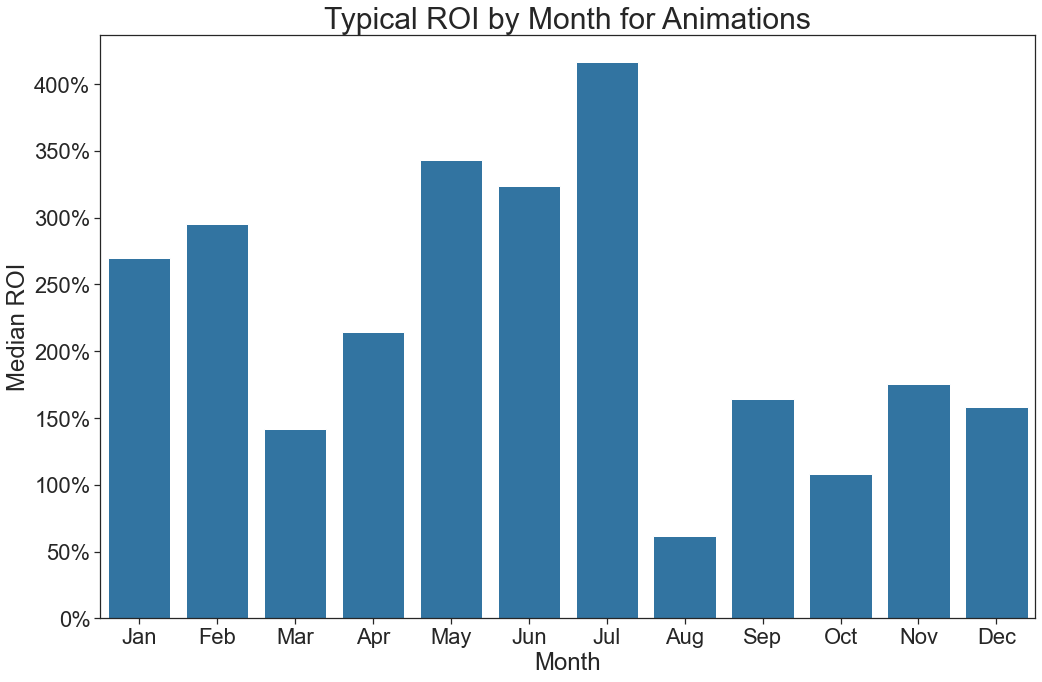

In [153]:
# group animations by month and calculate median values
animation_roi_group_month = imdb_tn[imdb_tn['genres'] == 'Animation'].groupby(['month']).median()

# create figure, axis
month_fig, month_ax = plt.subplots()

#create visual
roi_bar = sns.barplot(data= animation_roi_group_month, x= animation_roi_group_month.index,
                      y ='worldwide_ROI', color='tab:blue', ax = month_ax,
                      order= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

month_ax.set_title('Typical ROI by Month for Animations', fontsize=30)
roi_bar.set_xlabel('Month')
roi_bar.set_ylabel('Median ROI')

# set yticklabels to be a %
yticklabels = [f'{tick *100:.0f}%' for tick in roi_bar.get_yticks()]
roi_bar.set_yticklabels(yticklabels)

# set tight layout for saving as png
plt.tight_layout()

# save as png
month_fig.savefig('Images/month_median_roi')

In [104]:
# calculate median ROI for animations for May, Jun, Jul
animation_summer_ROI = imdb_tn[(imdb_tn['genres'] == 'Animation')\
                               & (imdb_tn['month'].isin(['May', 'Jun', 'Jul']))]['worldwide_ROI'].median()

# calculate median ROI for animations for all months.
all_animations_median_ROI = imdb_tn[imdb_tn['genres'] == 'Animation']['worldwide_ROI'].median()

# calculate lift for median ROI of animations.
lift(animation_summer_ROI, all_animations_median_ROI)

79.44408912601003

###### Our recommendation would be to release animations during the summer.  The summer months of May, June, and July result in a lift of 79% to the median ROI for animated movies. 

### Is there an ideal runtime for animated movies?

This question will explore the relationship between runtime and a reach metric. We will use the IMDb DataFrame. The two reach metrics are an average rating and the number of votes. To choose the best metric we will first calculate the correlation between each of the metrics and ROI.  

<ipython-input-162-4db488cbc332>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


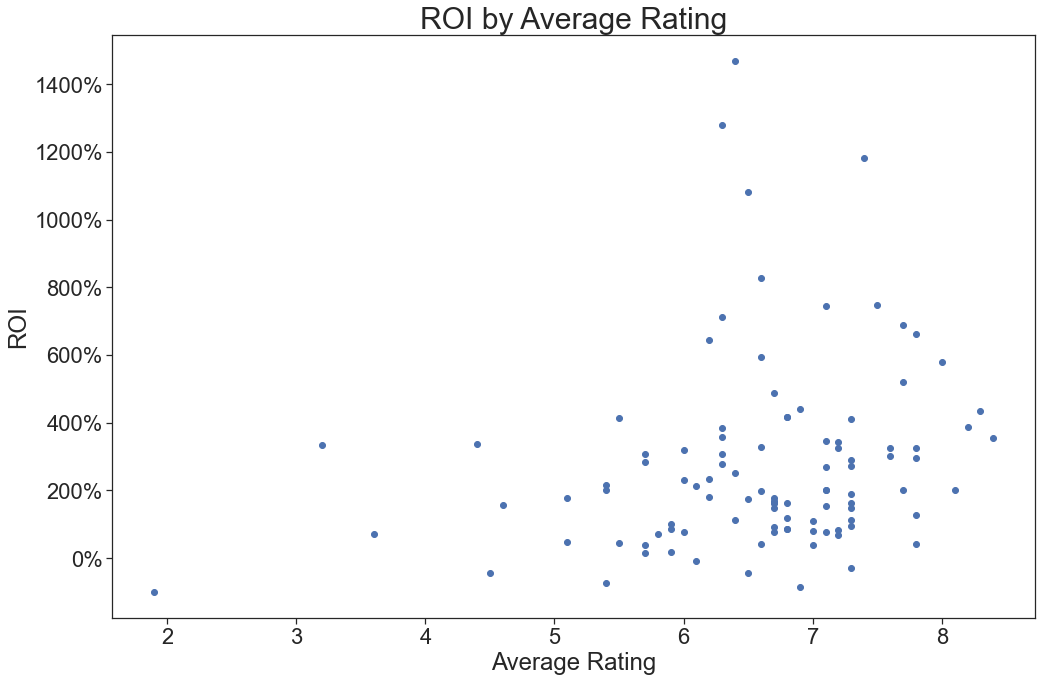

In [162]:
fig, ax = plt.subplots()

animated_imdb_tn = imdb_tn[imdb_tn['genres'] == 'Animation']

ax.scatter(x=animated_imdb_tn['averagerating'], y=animated_imdb_tn['worldwide_ROI'])
ax.set_xlabel('Average Rating')
ax.set_ylabel('ROI')
ax.set_title('ROI by Average Rating', fontsize=30)

# set yticklabels to be a %
yticklabels = [f'{tick *100:.0f}%' for tick in ax.get_yticks()]
ax.set_yticklabels(yticklabels)

# set tight layout for saving as png
plt.tight_layout()

# save as png
fig.savefig('Images/rating_roi_correlation')

In [106]:
np.corrcoef(animated_imdb_tn['averagerating'], animated_imdb_tn['worldwide_ROI'])[0][1]

0.21294657244635284

<ipython-input-161-0f68611bfa61>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
<ipython-input-161-0f68611bfa61>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


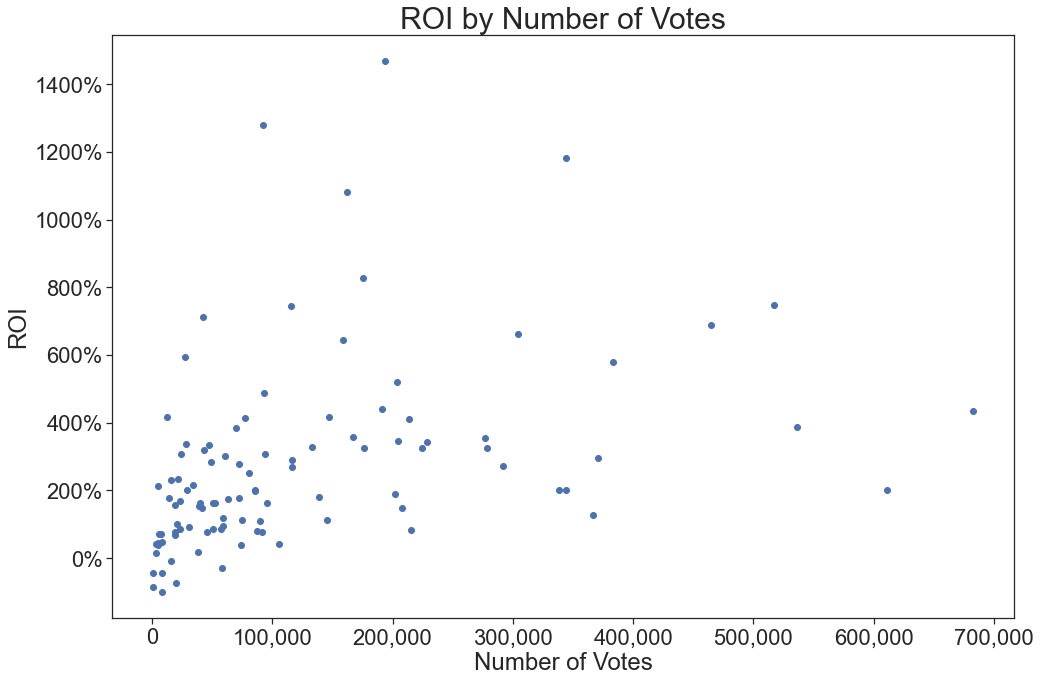

In [161]:
fig, ax = plt.subplots()

ax.scatter(x=animated_imdb_tn['numvotes'], y=animated_imdb_tn['worldwide_ROI'])
ax.set_xlabel('Number of Votes')
ax.set_ylabel('ROI')
ax.set_title('ROI by Number of Votes', fontsize=30)

# set xticklabels to have ',' in the numbers
xticklabels = [f'{tick:,.0f}' for tick in ax.get_xticks()]
ax.set_xticklabels(xticklabels)

# set yticklabels to be a %
yticklabels = [f'{tick *100:.0f}%' for tick in ax.get_yticks()]
ax.set_yticklabels(yticklabels)

# set tight layout for saving as png
plt.tight_layout()

# save as png
month_fig.savefig('Images/votes_roi_correlation')

In [108]:
np.corrcoef(animated_imdb_tn['numvotes'], animated_imdb_tn['worldwide_ROI'])[0][1]

0.3918585185390512

Correlation:
- averagerating and worldwide_ROI = 0.21
- numvotes and worldwide_ROI = 0.39

The correlation is stronger for number of votes than it is for average rating. Therefore, we will use the number of votes as a proxy for reach.

In [109]:
# filter animated movies
animated = imdb[imdb['genres'] == 'Animation']

# check info
animated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, joe finds grace2017 to the pilgrim's progress2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1739 non-null   object 
 1   runtime_minutes  1613 non-null   float64
 2   genres           1739 non-null   object 
 3   averagerating    1739 non-null   float64
 4   numvotes         1739 non-null   float64
dtypes: float64(3), object(2)
memory usage: 81.5+ KB


There are 1,739 animated movies, 1,613 of which have a runtime. Let's drop those without one.

In [110]:
# drop animated movies without a runtime
animated = animated.dropna(subset=['runtime_minutes'])

# check
animated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1613 entries, joe finds grace2017 to the pilgrim's progress2019
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    1613 non-null   object 
 1   runtime_minutes  1613 non-null   float64
 2   genres           1613 non-null   object 
 3   averagerating    1613 non-null   float64
 4   numvotes         1613 non-null   float64
dtypes: float64(3), object(2)
memory usage: 75.6+ KB


### Create bins for runtime minutes

The `runtime_minutes` column is currently a continuous variable. We are going to bin this variable to allow for group and barplot creation. A scatter plot could have been chosen for the continuous variable, but we are less concerned with the precision in minutes as we are a rough approximation of runtime. Also, binning by 10 minutes will decrease any noise in minute by minute runtimes.

In [111]:
# create bins for runtime
labels = ['<60', 60, 70, 80, 90, 100, 110, 120, 130, 140, '150+']
bins = [0, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, max(animated['runtime_minutes'])]
animated['runtime_bins'] = pd.cut(animated['runtime_minutes'], bins=bins, labels=labels)

# take a look
animated.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,runtime_bins
movie_id,,,,,,
joe finds grace2017,Joe Finds Grace,83.0,Animation,8.1,263.0,80
the tragedy of man2011,The Tragedy of Man,160.0,Animation,7.8,584.0,150+
foodfight!2012,Foodfight!,91.0,Animation,1.9,8248.0,90
quantum quest: a cassini space odyssey2010,Quantum Quest: A Cassini Space Odyssey,45.0,Animation,5.1,287.0,<60
bunyan and babe2017,Bunyan and Babe,84.0,Animation,5.0,302.0,80


In [112]:
animated['runtime_bins'].value_counts().sort_index()

<60     153
60      135
70      326
80      448
90      298
100     134
110      71
120      22
130      14
140       5
150+      7
Name: runtime_bins, dtype: int64

We can see the distribution of bins above. They are relatively equal sized, except for the movies over 110 minutes. Let's redo the bins with 110+ as the max bin.

In [113]:
# create bins for runtime
labels = ['<60', 60, 70, 80, 90, 100, '110+']
bins = [0, 60, 70, 80, 90, 100, 110, max(animated['runtime_minutes'])]
animated['runtime_bins'] = pd.cut(animated['runtime_minutes'], bins=bins, labels=labels)

# take a look
animated.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,runtime_bins
movie_id,,,,,,
joe finds grace2017,Joe Finds Grace,83.0,Animation,8.1,263.0,80
the tragedy of man2011,The Tragedy of Man,160.0,Animation,7.8,584.0,110+
foodfight!2012,Foodfight!,91.0,Animation,1.9,8248.0,90
quantum quest: a cassini space odyssey2010,Quantum Quest: A Cassini Space Odyssey,45.0,Animation,5.1,287.0,<60
bunyan and babe2017,Bunyan and Babe,84.0,Animation,5.0,302.0,80


In [114]:
animated['runtime_bins'].value_counts().sort_index()

<60     153
60      135
70      326
80      448
90      298
100     134
110+    119
Name: runtime_bins, dtype: int64

### Create some helpful functions

The following functions will be used to help make various graphs.

In [115]:
# create function to automate group creation
def create_group(df, groups, aggregation, sortby):
    grouped_df = df.groupby(groups).agg(aggregation).sort_values(sortby, ascending=False)
    return grouped_df

In [116]:
# create function for passing percentiles to create_group function
def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    return percentile_

In [136]:
# create function to automate barplot creation
def make_barplot(df, height, title, xlabel, ylabel, color_scheme):
    # define figure/axis
    fig, ax = plt.subplots(figsize=(15,10))
    
    # create visual
    ax = sns.barplot(
        data = df,
        x = df.index,
        y = height,
        color= color_scheme
    )
    
    # set title and axis labels
    ax.set_title(title, fontsize=30)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # set yticklabels to have ',' in the numbers
    yticklabels = [f'{tick:,.0f}' for tick in ax.get_yticks()]
    ax.set_yticklabels(yticklabels)

    # remove the gridlines
    ax.grid(False)
    
    plt.tight_layout()
    
    return fig

### Number of Votes by Runtime

In [137]:
# take a look at descriptive statistics
animated['numvotes'].describe()

count      1613.000000
mean       9514.907006
std       47060.914737
min           5.000000
25%          26.000000
50%         121.000000
75%         825.000000
max      682218.000000
Name: numvotes, dtype: float64

<ipython-input-163-bf46268c4bd9>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


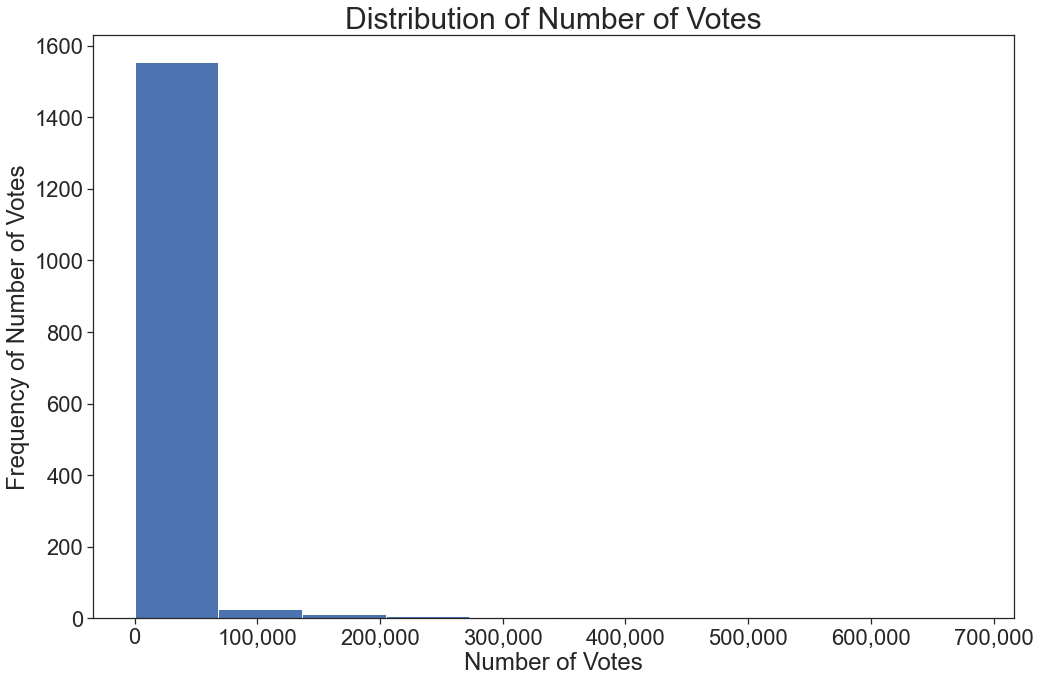

In [163]:
# histogram for number of votes
fig, ax = plt.subplots()

ax.hist(animated['numvotes'])
ax.set_xlabel('Number of Votes')
ax.set_ylabel('Frequency of Number of Votes')
ax.set_title('Distribution of Number of Votes', fontsize=30)

# set xticklabels to have ',' in the numbers
xticklabels = [f'{tick:,.0f}' for tick in ax.get_xticks()]
ax.set_xticklabels(xticklabels)

# set tight layout for saving as png
plt.tight_layout()

# save as png
month_fig.savefig('Images/animated_votes_histogram')

We see from the histogram and descriptive statistics that the number of votes is highly skewed. The average will not be a useful metric for analyzing this column. We will use the median and quantiles to describe this feature.

In [139]:
# 90th percentile votes by runtime for animation
animated_rt_90th_votes = create_group(animated, groups='runtime_bins', aggregation=percentile(.9), sortby='numvotes')

# median votes by runtime for animation
animated_rt_median_votes = create_group(animated, groups='runtime_bins', aggregation='median', sortby='numvotes')

# 10th percentile votes by runtime for animation
animated_rt_10th_votes = create_group(animated, groups='runtime_bins', aggregation=percentile(.1), sortby='numvotes')

<ipython-input-136-8f23325fb781>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


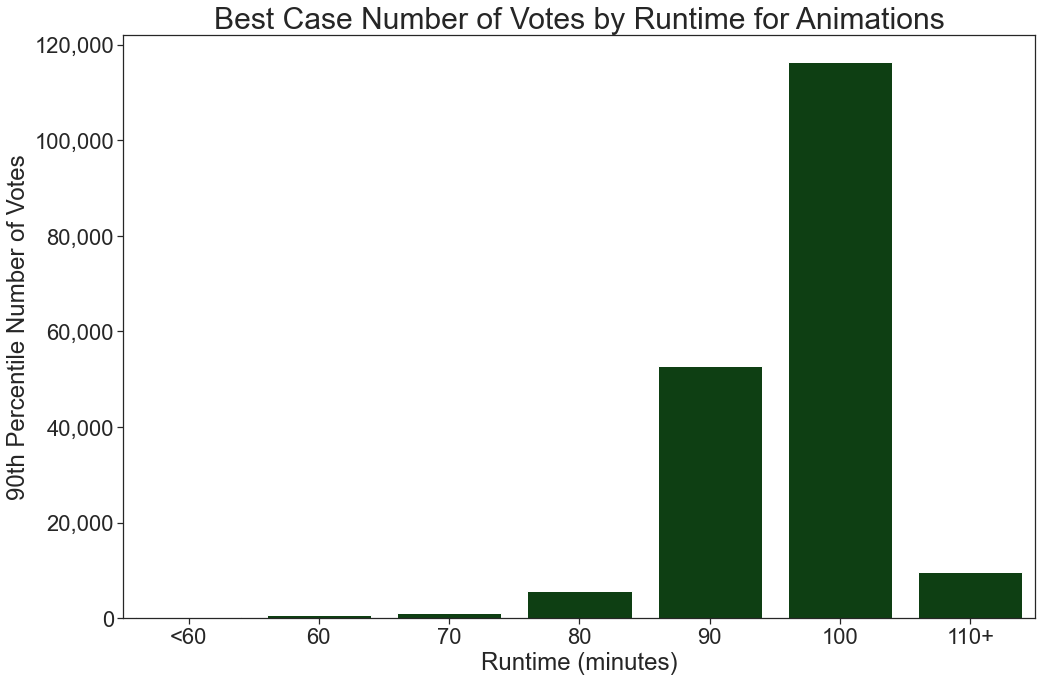

In [150]:
animated_rt_90th_votes_plot = make_barplot(animated_rt_90th_votes,                                               
                                           height='numvotes',
                                           title='Best Case Number of Votes by Runtime for Animations',
                                           xlabel='Runtime (minutes)',
                                           ylabel='90th Percentile Number of Votes',
                                           color_scheme='#06470c'
                                          )
animated_rt_90th_votes_plot.savefig('Images/animation_90th')

<ipython-input-136-8f23325fb781>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


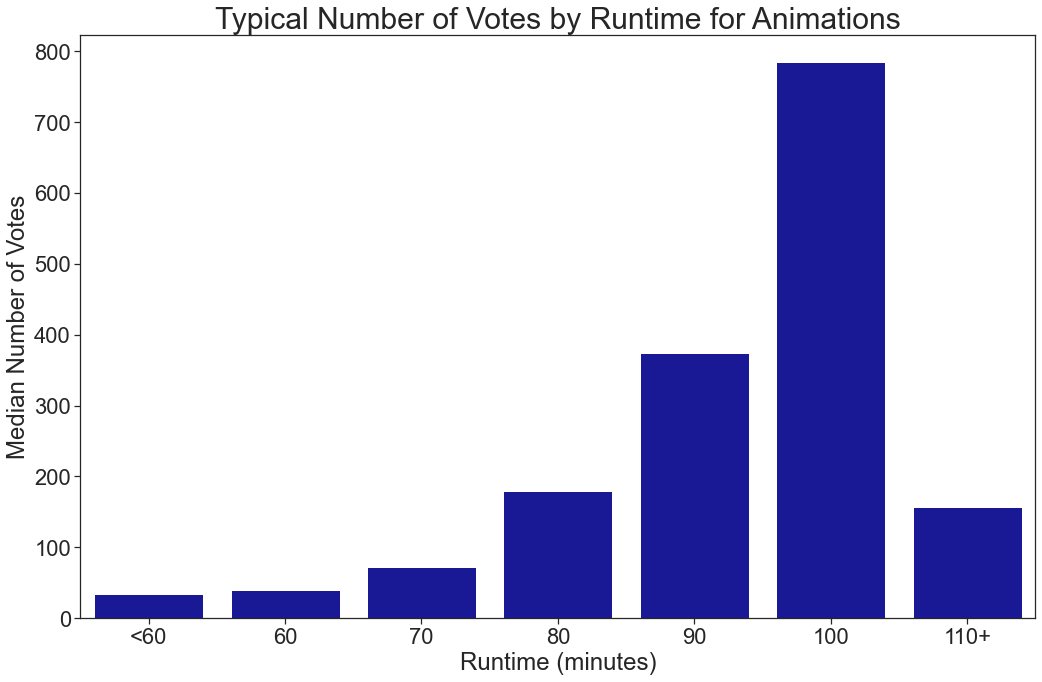

In [151]:
animated_rt_median_votes_plot = make_barplot(animated_rt_median_votes,                                             
                                             height='numvotes',
                                             title='Typical Number of Votes by Runtime for Animations',
                                             xlabel='Runtime (minutes)',
                                             ylabel='Median Number of Votes',
                                             color_scheme='#0504aa'
                                             )

animated_rt_median_votes_plot.savefig('Images/animation_median')

<ipython-input-136-8f23325fb781>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


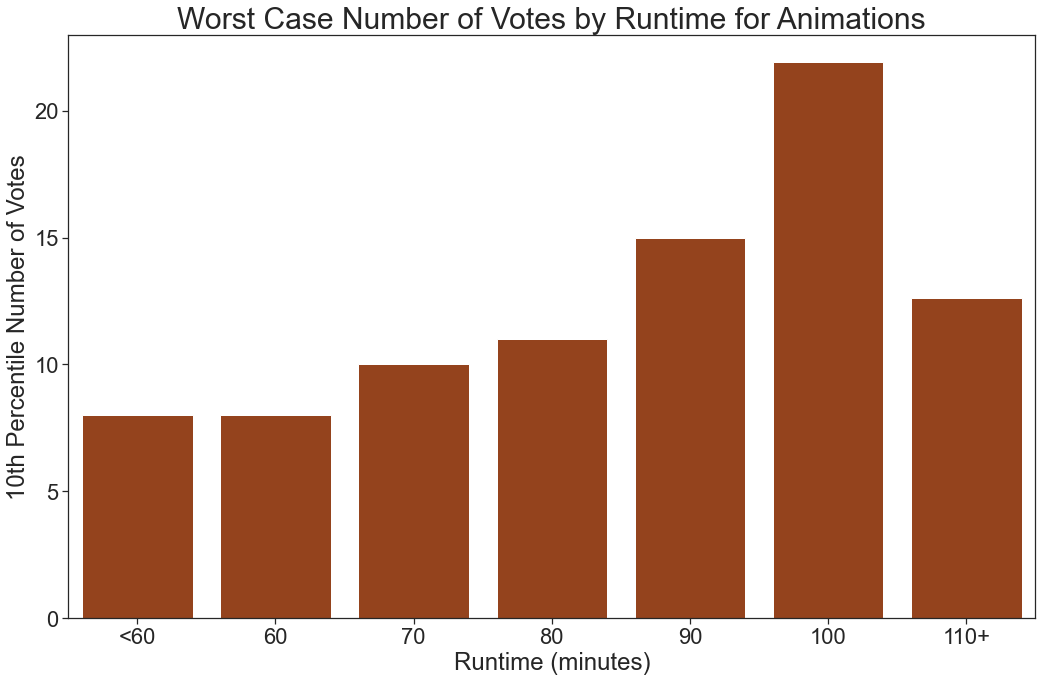

In [152]:
animated_rt_10th_votes_plot = make_barplot(animated_rt_10th_votes,                                               
                                           height='numvotes',
                                           title='Worst Case Number of Votes by Runtime for Animations',
                                           xlabel='Runtime (minutes)',
                                           ylabel='10th Percentile Number of Votes',
                                           color_scheme='#a83c09'
                                          )
animated_rt_10th_votes_plot.savefig('Images/animation_10th')

The 100-minute runtime is best in all cases. Next, let's calculate the lift in number of votes we get for a 100-minute movie.

In [147]:
# median number of votes for 100-minute animations
rt_100_median_votes = animated_rt_median_votes.loc[100]['numvotes']

# median number of votes for all animations
rt_median_votes = animated['numvotes'].median()

# lift
median_votes_lift = lift(rt_100_median_votes, rt_median_votes)

print(f'100-minute median: {rt_100_median_votes:.0f}\n' \
      f'overall median: {rt_median_votes:.0f}\n' \
      f'lift: {median_votes_lift:.0f}%')

100-minute median: 784
overall median: 121
lift: 548%


In [148]:
# 90th percentile number of votes for 100-minute animations
rt_100_90th_votes = animated_rt_90th_votes.loc[100]['numvotes']

# 90th percentile number of votes for all animations
rt_90th_votes = animated['numvotes'].quantile(0.9)

# lift
p90th_votes_lift = lift(rt_100_90th_votes, rt_90th_votes)

print(f'100-minute 90th: {rt_100_90th_votes:.0f}\n' \
      f'overall 90th: {rt_90th_votes:.0f}\n' \
      f'lift: {p90th_votes_lift:.0f}%')

100-minute 90th: 116288
overall 90th: 7413
lift: 1469%


In [149]:
# 10th percentile number of votes for 100-minute animations
rt_100_10th_votes = animated_rt_10th_votes.loc[100]['numvotes']

# 10th percentile number of votes for all animations
rt_10th_votes = animated['numvotes'].quantile(0.1)

# lift
p10th_votes_lift = lift(rt_100_10th_votes, rt_10th_votes)

print(f'100-minute 10th: {rt_100_10th_votes:.0f}\n' \
      f'overall 10th: {rt_10th_votes:.0f}\n' \
      f'lift: {p10th_votes_lift:.0f}%')

100-minute 10th: 22
overall 10th: 10
lift: 119%


### Recommendation

**We recommend that the runtime for an animation movie be about 100 minutes.**

The 90th, 50th, and 10th percentile outcome for an animation with a runtime of 100 minutes is superior to its peers.

**Typically, a 100-minute animation increases the number of votes by 548%, or 6.48x.**
**In the best cases, a 100-minute animation yields a 15.69x multiple.**
**Even in the worst cases, a 100-minute animation is 2.29x better than its peers.**

## Conclusions

Summarize notebook and specifically recs. Be succinct.

### Future Work

Grab future work from slides. Add any if you want.